In [1]:
import pickle

In [2]:
x = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('Y.pkl','rb'))

In [6]:
x

array([[[[ 97,  91,  72],
         [ 85,  79,  60],
         [ 89,  83,  64],
         ...,
         [202, 211, 225],
         [197, 206, 220],
         [195, 204, 218]],

        [[ 96,  89,  70],
         [ 87,  81,  62],
         [ 91,  85,  66],
         ...,
         [197, 206, 220],
         [197, 206, 220],
         [194, 203, 217]],

        [[ 99,  93,  74],
         [ 99,  93,  74],
         [103,  97,  78],
         ...,
         [197, 206, 220],
         [198, 207, 221],
         [193, 202, 216]],

        ...,

        [[182, 194, 205],
         [143, 148, 142],
         [156, 141, 137],
         ...,
         [216, 226, 233],
         [214, 224, 231],
         [218, 228, 235]],

        [[186, 192, 200],
         [153, 138, 131],
         [159, 121, 117],
         ...,
         [217, 227, 234],
         [215, 225, 232],
         [219, 229, 236]],

        [[150, 172, 177],
         [165, 169, 172],
         [205, 205, 206],
         ...,
         [215, 225, 232],
        

In [7]:
y

array([0, 1, 0, ..., 1, 0, 0])

In [9]:
# feature scaling (to calcullate fast)
x = x/255

In [10]:
x.shape # (images, size , size, RGB)

(10028, 100, 100, 3)

In [12]:
! pip install keras

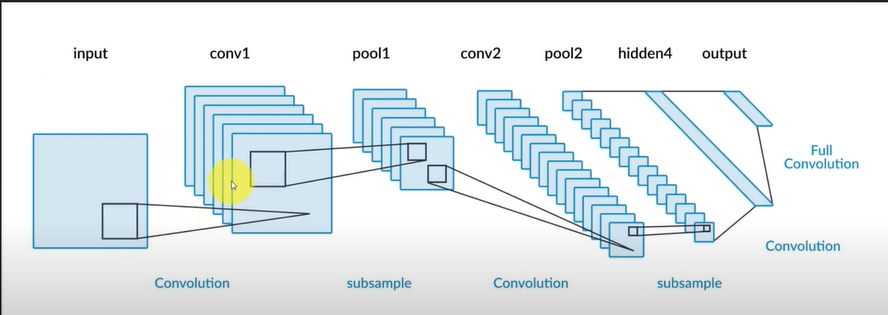

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense 

In [16]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x,y, epochs=5, validation_split=0.1)

Epoch 1/5
283/283 [==============================] - 119s 408ms/step - loss: 0.6859 - accuracy: 0.5700 - val_loss: 0.6579 - val_accuracy: 0.6002
Epoch 2/5
283/283 [==============================] - 110s 390ms/step - loss: 0.6194 - accuracy: 0.6501 - val_loss: 0.5683 - val_accuracy: 0.7049
Epoch 3/5
283/283 [==============================] - 112s 394ms/step - loss: 0.5257 - accuracy: 0.7388 - val_loss: 0.6482 - val_accuracy: 0.6650
Epoch 4/5
283/283 [==============================] - 111s 392ms/step - loss: 0.4941 - accuracy: 0.7598 - val_loss: 0.5178 - val_accuracy: 0.7408
Epoch 5/5
283/283 [==============================] - 112s 396ms/step - loss: 0.3769 - accuracy: 0.8338 - val_loss: 0.6096 - val_accuracy: 0.7268
